# APTSTORE : POPULARITY PREDICTION ALGORITHM (PPA)

#### This algorithm is proposed in the following paper. I, Dayanand Raut (IIT Roorkee [Mtech 2020-2022]), have implemented it in python and simulated the data to run the algorithm and display its result.

###### K. R. Krish, A. Khasymski, A. R. Butt, S. Tiwari and M. Bhandarkar, "AptStore: Dynamic storage management for hadoop," 2013 IEEE International Conference on Cluster Computing (CLUSTER), 2013, pp. 1-5, doi: 10.1109/CLUSTER.2013.6702657.


### Import libraries such as pandas, matlibplot and random

In [61]:
import pandas as pd
import matplotlib.pyplot as plot
import random as rd

### Implementation of PPA

In [62]:
def predict_popularity(accessed_files, deleted_files, popularity,block_numbers, l, c, s):
    P = {}
    IP = 0
    Pred = {}
    avg_popularity = find_average_popularity(popularity)
    for f in set(accessed_files):
        P[f] = [avg_popularity]
        
    for k in range(0, len(accessed_files)-1):
        f = accessed_files[k]
        i = len(P[f])-1
        
        if(i==0):
            continue
        
        else:
            a = find_access_interval(f,k,accessed_files)
            b = find_block_number(f, block_numbers)
            calc = P[f][i] + c / (a*b*l*P[f][i])
            P[f].append(calc)
            
        if(P[f][i]<Pmin):
            P[f][i] = Pmin 
            
        if(P[f][i]>Pmax):
            P[f][i] = Pmax 
            
        IP = IP + P[f][i+1] - P[i][f]
        
    for f in deleted_files:
        #avg = find_average_popularity(popularity)
        IP = IP + avg_popularity - popularity[f]
        del P[f]
        del popularity[f]
        del block_numbers[f]
        
    MIP = IP / len(P)
    
    for f in P:
        i = len(P[f]) - 1
        P[f][i] - P[f][i] - MIP/s
        Pred[f] = P[f][i] + popularity[f]
        popularity[f] = P[f][i]          
        
    return Pred
 
#--------------------------HELPER FUNCTIONS-----------------------------        
def find_average_popularity(popularity):
    sum = 0
    for f in popularity:
        sum = sum + popularity[f]
        
    return sum/len(popularity)


def find_access_interval(f,k,files):
    key = accessed_files[k]
    k -= 1
    count  =  1
    while(k>=0):
        if(key==files[k]):
            break
        k -= 1
        count += 1
        
    return count * rd.random()

def find_block_numbers(f, block_number):
    return block_number[f]

### Simulation Functions

In [67]:
def simulate_popularity(accessed_files, Pmin, Pmax):
    p = {}
    for f in set(accessed_files):
        p[f] = rd.uniform(Pmin, Pmax)
        
    return p
        
        
def simulate_block_number(accessed_files, Bmin, Bmax):
    b = {}
    for f in set(accessed_files):
        b[f] = rd.randint(Bmin, Bmax)
        
    return b

def simulate_deleted_files(accessed_files):
    deleted = set()
    files = list(set(accessed_files))
    n = rd.randint(1, int(len(files)/3) + 1)
    for i in range(0, n):
        x = rd.choice(files)
        deleted.add(x)
        
    return deleted  

def simulate_accessed_files(number_of_files): 
    accessed_files = []
    n = rd.randint(number_of_files+5, 2 * number_of_files)
    for i in range(0, n):
        accessed_files.append(rd.randint(1, number_of_files))
        
    return accessed_files

### Printing functions

In [68]:
def print_popularity(popularity, block_numbers):
    print("Files \t\t Popularity \t Number_of_blocks")
    print("-----------------------------------------------")
    for f in popularity:
        print("file", f, ":\t", round(popularity[f],3),"\t\t", block_numbers[f] )
        
        
def print_predicted_popularity(pred):
    print("Files \t\t Predicted_Popularity")
    print("------------------------------------")
    for f in pred:
        print("file", f, ":\t", round(pred[f],3))

## SIMULATION

Files 		 Popularity 	 Number_of_blocks
-----------------------------------------------
file 1 :	 0.328 		 7
file 3 :	 0.548 		 32
file 4 :	 0.557 		 36
file 5 :	 0.218 		 36
file 7 :	 0.105 		 50
file 9 :	 0.17 		 27

Accessing files:  [3, 4, 9, 4, 3, 1, 1, 4, 1, 1, 9, 7, 4, 9, 4, 5, 5, 1]
Deleting files:  [3]



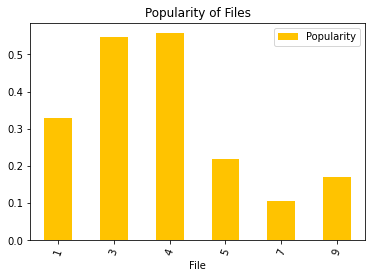

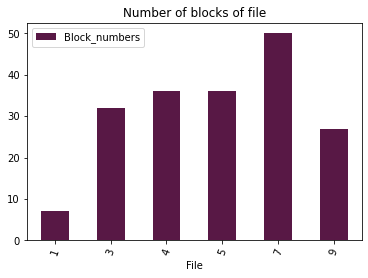

In [79]:
Pmin = 0.1
Pmax = 0.9
accessed_files = simulate_accessed_files(9)
popularity = simulate_popularity(accessed_files, Pmin, Pmax)
Bmin = 1
Bmax = 50
block_numbers = simulate_block_number(accessed_files, Bmin, Bmax)
c = 10000
l = 9
s = 5
popularity_data = [[k,round(popularity[k],3), block_numbers[k]] for k in popularity ]

print_popularity(popularity, block_numbers)
print()
print("Accessing files: ", accessed_files)
deleted_files = list(simulate_deleted_files(accessed_files))
print("Deleting files: ", deleted_files)
print()

# Showing the simulated result in graph
# Bar graph of popularity
popularity_df = pd.DataFrame(popularity_data, columns = ['File', 'Popularity', 'Block_numbers'])
popularity_df.plot.bar(x="File", y="Popularity", color='#FFC300', rot=70, title="Popularity of Files");
plot.show(block=True)

#Bar Graph of block numbers
popularity_df.plot.bar(x="File", y="Block_numbers", color='#581845', rot=70, title="Number of blocks of file");
plot.show(block=True)

### Predicting the popularity


Files 		 Predicted_Popularity
------------------------------------
file 1 :	 0.649
file 4 :	 0.878
file 5 :	 0.539
file 7 :	 0.426
file 9 :	 0.491


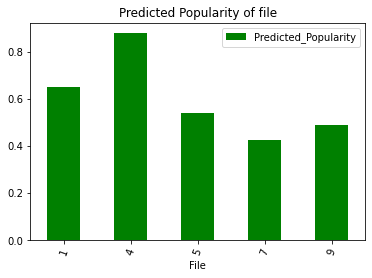

In [80]:
pred = predict_popularity(accessed_files, deleted_files, popularity,block_numbers, l, c, s)
print()
print_predicted_popularity(pred) 

# showing the result in graph
predicted_data  = [[k, round(pred[k],3)] for k in pred]
predicted_df = pd.DataFrame(predicted_data, columns=['File', 'Predicted_Popularity'])
predicted_df.plot.bar(x="File", y="Predicted_Popularity", color='g', rot=70, title="Predicted Popularity of file");
plot.show(block=True)